# Using Pandas DataFrames

In [1]:
import quasardb
import quasardb.pandas as qdbpd
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
sample_size=10
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
print(quasardb.version())

3.4.1


In [2]:
c = quasardb.Cluster("qdb://qdb-server:2836")


<b>Create dataframe with two columns</b>

In [3]:
#create timestamps to associate to timeseries
timestamps = np.array('2019-03-14', dtype=np.datetime64)+ np.arange(sample_size)

# Generate random doubles of timeserie
double_values = np.random.uniform(0.0, 100.0, sample_size)
# Generate random doubles of timeserie
int_values = np.random.randint(0, 100, sample_size)

pandas_frame = pd.DataFrame (index=timestamps,data={'close':double_values,'volume':int_values})
pandas_frame[:5]

,close,volume
2019-03-14,94.900035,4
2019-03-15,96.050342,92
2019-03-16,52.386698,2
2019-03-17,4.718129,99
2019-03-18,46.004744,85


<b>No need to create table in advance. The API will take care of everything</b>

In [4]:

qdbpd.write_dataframe(pandas_frame, c, "ts_pandas_1",create=True)


<b>Reading back the data</b>

In [5]:
table = c.ts("ts_pandas_1")
read_dataframe = qdbpd.read_dataframe(table)
assert read_dataframe['close'].size == sample_size

In [6]:
read_dataframe[:5]

,close,volume
2019-03-14,94.900035,4
2019-03-15,96.050342,92
2019-03-16,52.386698,2
2019-03-17,4.718129,99
2019-03-18,46.004744,85


<b> Query data as a Pandas dataframe </b>

In [7]:
query= c.query("select * from ts_pandas_1")
query_result = query.run()

In [8]:
tmp = dict()
for col in query_result.tables['ts_pandas_1']:
    tmp[col.name] = col.data
result_as_pandas = pd.DataFrame.from_dict(tmp, orient='columns').set_index('$timestamp')
assert result_as_pandas['close'].size == sample_size
result_as_pandas[:5]

,close,volume
$timestamp,,
2019-03-14,94.900035,4
2019-03-15,96.050342,92
2019-03-16,52.386698,2
2019-03-17,4.718129,99
2019-03-18,46.004744,85


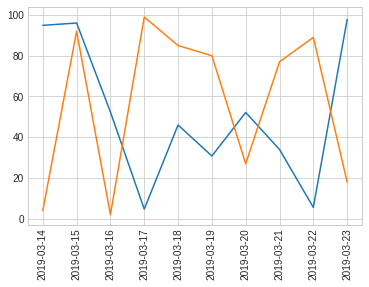

In [9]:
plt.style.use('seaborn-whitegrid')
plt.plot(result_as_pandas.index,result_as_pandas )
plt.xticks(rotation=90)
plt.show()

In [10]:
#tearing down data for this sample
table = c.ts("ts_pandas_1")
table.remove()